In [9]:
include("../../src/repeat_testing_scenarios.jl")
using DataFrames
using StatsPlots
using CSV

In [10]:
Ntot = 100000
Nscens = length(scen_names)

7

In [24]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.4, false)
dfh_noconf = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_noconf["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_noconf["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end

scen_means_noconf = zeros(Nscens)
scen_iprs_noconf = zeros(Nscens)
for j in 1:Nscens
    scen_means_noconf[j] = mean(scenarios[j]["inf_days"])
    scen_iprs_noconf[j] = mean(dfh_noconf["InfPot"][dfh_noconf["Scenario"] .== names[j]])
end

In [25]:
CSV.write("no_confPCR_Pisol100_LFDcomp40.csv",dfh_noconf)

"no_confPCR_Pisol100_LFDcomp40.csv"

In [22]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.4, true)
dfh_conf = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_conf["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_conf["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end


scen_means_conf = zeros(Nscens)
scen_iprs_conf = zeros(Nscens)

for j in 1:Nscens
    scen_means_conf[j] = mean(scenarios[j]["inf_days"])
    IPh = dfh_conf["InfPot"][dfh_conf["Scenario"] .== names[j]]
    scen_iprs_conf[j] = mean(IPh)
end

In [23]:
CSV.write("confPCR_Pisol100_LFDcomp40.csv",dfh_conf)

"confPCR_Pisol100_LFDcomp40.csv"

In [15]:
# plot(0:(inf_len-1),transpose(mean(all_infs,dims=1)),marker=:square,label="Infectiousness",linewidth=2)
# plot!(0:(inf_len-1),transpose(mean(all_symp_infs,dims=1)),marker=:circle,label="With Symp. Isol",linewidth=2)
# plot!(0:(inf_len-1),transpose(mean(all_sQ_infs,dims=1)),marker=:cross, label="Status Quo",linewidth=2)
# plot!(0:(inf_len-1),transpose(mean(all_2LFD_infs,dims=1)), label="2 LFDs", 
#     xlim=(0,30),ylim=(0,0.6), xlabel="Days since infection", marker=:x,
#     ylabel="Fraction infectious",linewidth=2,size=(600,375))

# savefig("infectiousness.png")

In [16]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.4, false; LFD_type=2)
dfh_noconf_LFD2 = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_noconf_LFD2["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_noconf_LFD2["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end

scen_means_noconf_LFD2 = zeros(Nscens)
scen_iprs_noconf_LFD2 = zeros(Nscens)
for j in 1:Nscens
    scen_means_noconf_LFD2[j] = mean(scenarios[j]["inf_days"])
    scen_iprs_noconf_LFD2[j] = mean(dfh_noconf_LFD2["InfPot"][dfh_noconf_LFD2["Scenario"] .== names[j]])
end

In [17]:
CSV.write("no_confPCR_Pisol100_LFDcomp40_LFD2.csv",dfh_noconf_LFD2)

"no_confPCR_Pisol100_LFDcomp40_LFD2.csv"

In [20]:
scenarios, names = run_testing_scenarios_impact(Ntot, 1.0, 0.4, true; LFD_type=2)
dfh_conf_LFD2 = DataFrame(Scenario=repeat(names,Ntot),InfDays=zeros(Nscens*Ntot),InfPot=zeros(Nscens*Ntot))
for i in 1:Ntot
    for j in 1:Nscens
        dfh_conf_LFD2["InfDays"][Nscens*(i-1)+j] = scenarios[j]["inf_days"][i]
        dfh_conf_LFD2["InfPot"][Nscens*(i-1)+j] = sum(scenarios[j]["inf_profile_isolation"][i])
    end
end

scen_means_conf_LFD2 = zeros(Nscens)
scen_iprs_conf_LFD2 = zeros(Nscens)
for j in 1:Nscens
    scen_means_conf_LFD2[j] = mean(scenarios[j]["inf_days"])
    scen_iprs_conf_LFD2[j] = mean(dfh_conf_LFD2["InfPot"][dfh_conf_LFD2["Scenario"] .== names[j]])
end

In [21]:
CSV.write("confPCR_Pisol100_LFDcomp40_LFD2.csv",dfh_conf_LFD2)

"confPCR_Pisol100_LFDcomp40_LFD2.csv"

In [13]:
inf_len = max(length.(scenarios[6]["infection_profiles"])...)
VL_len = max(length.(scenarios[6]["VL_profiles"])...)
all_infs = zeros(Float64,(Ntot,inf_len))
all_symp_infs = zeros(Float64,(Ntot,inf_len))
all_sQ_infs = zeros(Float64,(Ntot,inf_len))
all_2LFD_infs = zeros(Float64,(Ntot,inf_len))
all_PCR = zeros(Float64,(Ntot,VL_len))
all_LFD = zeros(Float64,(Ntot,VL_len))
all_LFD2 = zeros(Float64,(Ntot,VL_len))
for i in 1:Ntot
    all_infs[i,1:length(scenarios[6]["infection_profiles"][i])] = 
                      scenarios[6]["infection_profiles"][i]
    all_symp_infs[i,1:length(scenarios[6]["inf_profile_isolation"][i])] = 
                      scenarios[6]["inf_profile_isolation"][i]
    all_sQ_infs[i,1:length(scenarios[1]["inf_profile_isolation"][i])] = 
                      scenarios[1]["inf_profile_isolation"][i]
    all_2LFD_infs[i,1:length(scenarios[5]["inf_profile_isolation"][i])] = 
                      scenarios[5]["inf_profile_isolation"][i]
    all_PCR[i,1:length(scenarios[6]["VL_profiles"][i])] = 
                      PCRtest_positive_prob.(scenarios[6]["VL_profiles"][i])
    all_LFD[i,1:length(scenarios[6]["VL_profiles"][i])] = 
                      LFDtest_positive_prob1.(scenarios[6]["VL_profiles"][i])
    all_LFD2[i,1:length(scenarios[6]["VL_profiles"][i])] = 
                      LFDtest_positive_prob2.(scenarios[6]["VL_profiles"][i])
end

In [16]:
plot(0:(VL_len-1),transpose(mean(all_PCR,dims=1)),label="PCR",linewidth=2,marker=:square)
plot!(0:(VL_len-1),transpose(mean(all_LFD,dims=1)),label="LFD",linewidth=2,marker=:circle)
plot!(0:(VL_len-1),transpose(mean(all_LFD2,dims=1)),xlim=(0,30),
    label="LFD (October sens.)",ylim=(0,1),linewidth=2,marker=:+,size=(400,250),
    xlabel="Days since infection",ylabel="Mean test positive probability")
savefig("test_pos.png")

4.82028

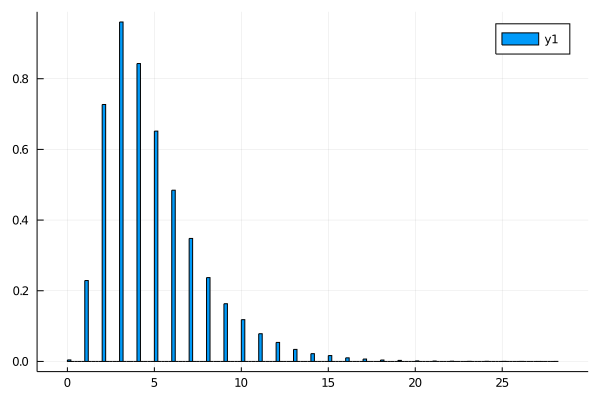

In [14]:
print(mean(scenarios[6]["symp_day"]))
histogram(scenarios[6]["symp_day"],normalize=true)

In [15]:
# max_inf = zeros(scenarios[6]["Ntot"])
# for i in 1:scenarios[6]["Ntot"]
#     max_inf[i] = max(scenarios[6]["infection_profiles"][i]...)
# end
# scatter(scenarios[6]["VL_mag"],max_inf)

In [71]:
meand = 45
beta = 0.15
test_dist = Gamma(meand*beta,1/beta)
x = 0:1:100
print(median(test_dist))

42.79835217646057

In [73]:
plot(x, pdf(test_dist,x),xlim=(0,100),ylim=(0,0.03), xlabel="PCR delay (hours)",
    ylabel="Probability Density",linewidth=2,size=(400,275),label=:none)
savefig("PCRdelay.png")

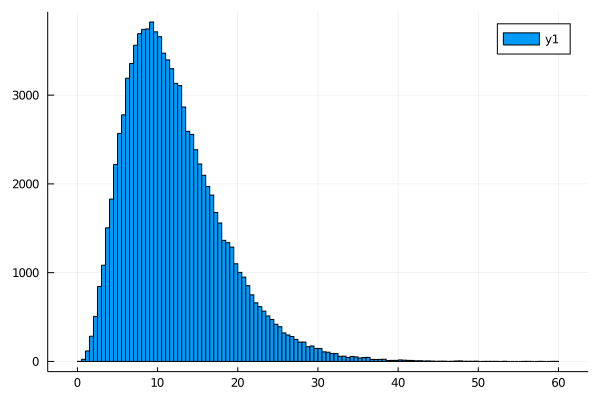

In [18]:
PTs = generate_peak_times(100000)
DTs = generate_decay_times(100000,rand([true,false],100000))
histogram(PTs.+DTs)

In [8]:
x = 0:0.1:12.0
y1 = PCRtest_positive_prob.(x)
y2 = LFDtest_positive_prob1.(x)
y3 = LFDtest_positive_prob2.(x)

plot(x,y1,label="PCR",linewidth=2)
plot!(x,y2,label="LFD",linewidth=2)
plot!(x,y3,xlim=(0,12),
    label="LFD (October sens.)",ylim=(0,1),linewidth=2,size=(400,275),
    xlabel="Viral load (log10 copies/ml)",ylabel="Mean test positive probability",
    legend=:bottomright)
savefig("test_pos_prob_VL.png")

In [57]:
plotattr([:Plot])

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, plot_title_location, plot_titlefontcolor, plot_titlefontfamily, plot_titlefonthalign, plot_titlefontrotation, plot_titlefontsize, plot_titlefontvalign, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title
